In [ ]:
import pandas as pd
import numpy as np
import os

In [ ]:
df=pd.read_excel('covid_data.xlsx')

In [ ]:
df

,date,local,import
0,2020-05-01,1,8
1,2020-05-02,0,6
2,2020-05-03,3,10
3,2020-05-04,0,8
4,2020-05-05,0,3
...,...,...,...
559,2021-11-11,2494,26
560,2021-11-12,2358,10
561,2021-11-13,2310,14
562,2021-11-14,2401,18


In [ ]:
df=df.drop(['import'],axis=1)

In [ ]:
df

,date,local
0,2020-05-01,1
1,2020-05-02,0
2,2020-05-03,3
3,2020-05-04,0
4,2020-05-05,0
...,...,...
559,2021-11-11,2494
560,2021-11-12,2358
561,2021-11-13,2310
562,2021-11-14,2401


In [ ]:
from numpy import linspace, exp # Cori의 Ws Gamma 분포
x=linspace(1,564,len(df)) # df의 개수만큼 나눔
x

array([  1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,  11.,
        12.,  13.,  14.,  15.,  16.,  17.,  18.,  19.,  20.,  21.,  22.,
        23.,  24.,  25.,  26.,  27.,  28.,  29.,  30.,  31.,  32.,  33.,
        34.,  35.,  36.,  37.,  38.,  39.,  40.,  41.,  42.,  43.,  44.,
        45.,  46.,  47.,  48.,  49.,  50.,  51.,  52.,  53.,  54.,  55.,
        56.,  57.,  58.,  59.,  60.,  61.,  62.,  63.,  64.,  65.,  66.,
        67.,  68.,  69.,  70.,  71.,  72.,  73.,  74.,  75.,  76.,  77.,
        78.,  79.,  80.,  81.,  82.,  83.,  84.,  85.,  86.,  87.,  88.,
        89.,  90.,  91.,  92.,  93.,  94.,  95.,  96.,  97.,  98.,  99.,
       100., 101., 102., 103., 104., 105., 106., 107., 108., 109., 110.,
       111., 112., 113., 114., 115., 116., 117., 118., 119., 120., 121.,
       122., 123., 124., 125., 126., 127., 128., 129., 130., 131., 132.,
       133., 134., 135., 136., 137., 138., 139., 140., 141., 142., 143.,
       144., 145., 146., 147., 148., 149., 150., 15

In [ ]:
from scipy.special import gamma # gamma 분포 계산
mu=4.8
sig=2.3
shape=mu**2/sig**2
scale=sig**2/mu
y=x**(shape-1)*exp(-x/scale)/(scale**shape*gamma(shape))
y

array([2.77020996e-002, 1.14424270e-001, 1.80013775e-001, 1.90746593e-001,
       1.62764846e-001, 1.21109316e-001, 8.19866509e-002, 5.17918918e-002,
       3.10335518e-002, 1.78360536e-002, 9.91106770e-003, 5.35610252e-003,
       2.82762877e-003, 1.46334811e-003, 7.44421744e-004, 3.73077839e-004,
       1.84534010e-004, 9.02198987e-005, 4.36539639e-005, 2.09267986e-005,
       9.94796567e-006, 4.69307658e-006, 2.19870564e-006, 1.02357402e-006,
       4.73739186e-007, 2.18085071e-007, 9.98976584e-008, 4.55495792e-008,
       2.06801429e-008, 9.35166501e-009, 4.21312463e-009, 1.89148333e-009,
       8.46402546e-010, 3.77583195e-010, 1.67952793e-010, 7.45026545e-011,
       3.29633563e-011, 1.45487697e-011, 6.40636390e-012, 2.81474174e-012,
       1.23411164e-012, 5.40011749e-013, 2.35844440e-013, 1.02815773e-013,
       4.47446335e-014, 1.94402734e-014, 8.43286116e-015, 3.65247881e-015,
       1.57967536e-015, 6.82245900e-016, 2.94259855e-016, 1.26753726e-016,
       5.45320016e-017, 2

In [ ]:
# 이산화된 감마 분포 코드 - 아닌듯..
#import scipy
#import scipy.stats as ss
#import numpy as np

#def discretize(alpha, ncat, dist=ss.gamma):
#    if dist == ss.gamma:
#        dist = dist(alpha, scale=1 / alpha)
#    elif dist == ss.lognorm:
#        dist = dist(s=alpha, scale=np.exp(0.5 * alpha**2))
#    quantiles = dist.ppf(np.arange(0, ncat) / ncat)
#    rates = np.zeros(ncat, dtype=np.double)
#    for i in range(ncat-1):
#        rates[i] = ncat * scipy.integrate.quad(lambda x: x * dist.pdf(x), 
#                                               quantiles[i], quantiles[i+1])[0]
#    rates[ncat-1] = ncat * scipy.integrate.quad(lambda x: x * dist.pdf(x), 
#                                                quantiles[ncat-1], np.inf)[0]
#    return rates

In [ ]:
#y2=discretize(shape,564)

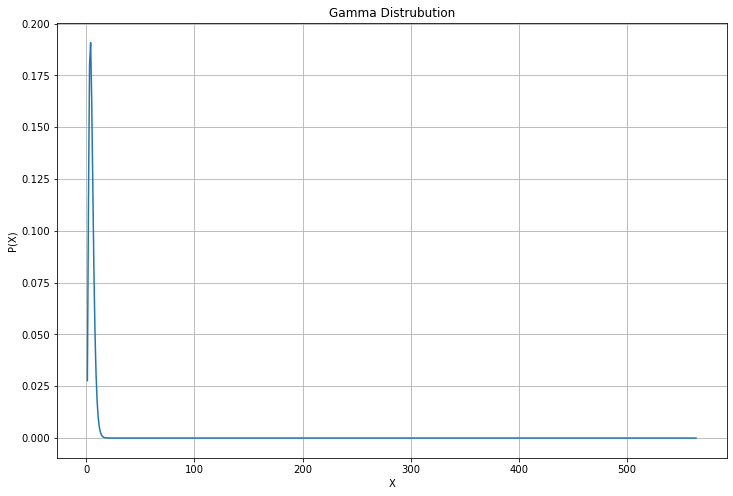

In [ ]:
import matplotlib.pyplot as plt # 그래프로 표현
%matplotlib inline

plt.figure(figsize=(12,8))
plt.plot(x,y)
plt.xlabel('X')
plt.ylabel('P(X)')
plt.title('Gamma Distrubution')
plt.grid()
plt.show()

In [ ]:
df['W']=y

In [ ]:
df

,date,local,W
0,2020-05-01,1,2.770210e-02
1,2020-05-02,0,1.144243e-01
2,2020-05-03,3,1.800138e-01
3,2020-05-04,0,1.907466e-01
4,2020-05-05,0,1.627648e-01
...,...,...,...
559,2021-11-11,2494,2.401001e-213
560,2021-11-12,2358,9.748223e-214
561,2021-11-13,2310,3.957800e-214
562,2021-11-14,2401,1.606859e-214


In [ ]:
#def Cori(i): # Cori first version
#  a=df['case'].values[i]            # It
#  b=df.loc[:i-1,'case'].sum()      #It-s, 수정 : iloc->loc : i-1 index가 포함됨, index 1에서 에러 뜨지 않음
#  r=a/(b*0.5)                       # Ws=0.5 고정?
#  return r

In [ ]:
def Cori(i): # Cori update version
  a=df['local'].values[i] # I_t
  b=0 # b 초기화
  for k in range(1,i):
    b+=df.loc[i-k,'local']*df.loc[k,'W'] # I_t-s * Ws 
  if(b>0):
    r=a/b 
  else:
    r=0 
  return r

In [ ]:
for i in range(1,len(df.index)):
  df.loc[i,'Cori']=Cori(i)

In [ ]:
#def Bett(i): # Bett first version
#  a=df['local'].values[i+1] # I_t+1
#  b=df['local'].values[i] # I_t
#  r=0.5*np.log(a/b)+1
#  return r

In [ ]:
g1=len(df)/df['local'].sum()
g1

0.001514594080730013

In [ ]:
g2=np.mean(df.loc[:,"W"])
g2

0.0017738346926872966

In [ ]:
# g가 평균 발생 시간이여서 하루/감염자수 이렇게 설정
g3=1/df['local']
g3=g3.replace([np.inf,-np.inf],np.nan).dropna()
g3=g3.mean()

In [ ]:
def Bett_g1(i): # Bett update version
  a=df['local'].values[i+1] # I_t+1
  b=df['local'].values[i] # I_t
  r=g1*np.log(a/b)+1 
  return r

In [ ]:
for i in range(7,len(df.index)-1):
  df.loc[i,'Bett_g1']=Bett_g1(i)

In [ ]:
def Bett_g2(i): # Bett update version
  a=df['local'].values[i+1] # I_t+1
  b=df['local'].values[i] # I_t
  r=g2*np.log(a/b)+1 
  return r

In [ ]:
for i in range(7,len(df.index)-1):
  df.loc[i,'Bett_g2']=Bett_g2(i)

In [ ]:
def Bett_g3(i): # Bett update version
  a=df['local'].values[i+1] # I_t+1
  b=df['local'].values[i] # I_t
  r=g3*np.log(a/b)+1 
  return r

In [ ]:
for i in range(7,len(df.index)-1):
  df.loc[i,'Bett_g3']=Bett_g3(i)

In [ ]:
df

,date,local,W,Cori,Bett_g1,Bett_g2,Bett_g3
0,2020-05-01,1,2.770210e-02,NaN,NaN,NaN,NaN
1,2020-05-02,0,1.144243e-01,0.000000,NaN,NaN,NaN
2,2020-05-03,3,1.800138e-01,0.000000,NaN,NaN,NaN
3,2020-05-04,0,1.907466e-01,0.000000,NaN,NaN,NaN
4,2020-05-05,0,1.627648e-01,0.000000,NaN,NaN,NaN
...,...,...,...,...,...,...,...
559,2021-11-11,2494,2.401001e-213,1.243435,0.999915,0.999901,0.998937
560,2021-11-12,2358,9.748223e-214,1.148363,0.999969,0.999964,0.999610
561,2021-11-13,2310,3.957800e-214,1.089071,1.000059,1.000069,1.000732
562,2021-11-14,2401,1.606859e-214,1.102904,0.999713,0.999663,0.996404


In [ ]:
import os

import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')

%matplotlib inline

from scipy.stats import gamma, poisson

!pip3 install epyestim

import epyestim
import epyestim.covid19 as covid19

In [ ]:
si_distrb = covid19.generate_standard_si_distribution()
delay_distrb = covid19.generate_standard_infection_to_reporting_distribution()

In [ ]:
ch_cases = pd.read_excel(
    os.path.join('', 'covid_data.xlsx'),
    parse_dates=['date']
).set_index('date')['local']

ch_cases

date
2020-05-01       1
2020-05-02       0
2020-05-03       3
2020-05-04       0
2020-05-05       0
              ... 
2021-11-11    2494
2021-11-12    2358
2021-11-13    2310
2021-11-14    2401
2021-11-15    1986
Name: local, Length: 564, dtype: int64

In [ ]:
ch_time_varying_r = covid19.r_covid(ch_cases,gt_distribution=si_distrb)
ch_time_varying_r.tail()

,cases,R_mean,R_var,Q0.025,Q0.5,Q0.975
2021-11-01,1664.0,1.051416,0.000154,1.027191,1.051368,1.075873
2021-11-02,1578.0,1.024851,0.000147,1.001356,1.024803,1.048717
2021-11-03,2640.0,1.007642,0.000142,0.984367,1.007595,1.031185
2021-11-04,2457.0,0.998335,0.000140,0.975299,0.998288,1.021636
2021-11-05,2322.0,0.991988,0.000139,0.969092,0.991942,1.015214


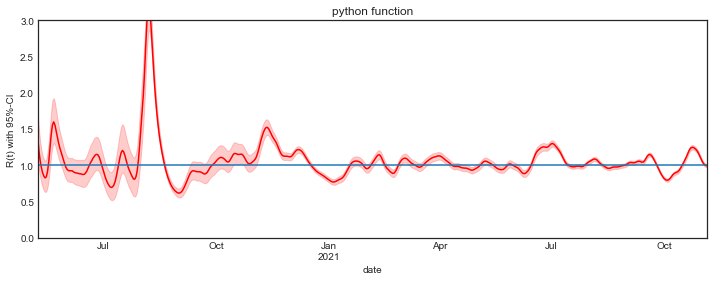

In [ ]:
# 파이썬 내장 함수
fig, ax = plt.subplots(1,1, figsize=(12, 4))

ch_time_varying_r.loc[:,'Q0.5'].plot(ax=ax, color='red')
ax.fill_between(ch_time_varying_r.index, 
                    ch_time_varying_r['Q0.025'], 
                    ch_time_varying_r['Q0.975'], 
                    color='red', alpha=0.2)
ax.set_xlabel('date')
ax.set_ylabel('R(t) with 95%-CI')
ax.set_ylim([0,3])
ax.axhline(y=1)
ax.set_title('python function')
plt.show()

In [ ]:
df2=df.dropna()
df2

,date,local,W,Cori,Bett_g1,Bett_g2,Bett_g3
7,2020-05-08,1,5.179189e-02,2.093135,1.004291,1.005026,1.053696
8,2020-05-09,17,3.103355e-02,31.458296,1.000644,1.000754,1.008052
9,2020-05-10,26,1.783605e-02,10.520571,1.000165,1.000194,1.002070
10,2020-05-11,29,9.911068e-03,4.474012,0.999582,0.999510,0.994764
11,2020-05-12,22,5.356103e-03,1.900035,1.000000,1.000000,1.000000
...,...,...,...,...,...,...,...
558,2021-11-10,2409,5.913638e-213,1.187737,1.000053,1.000062,1.000657
559,2021-11-11,2494,2.401001e-213,1.243435,0.999915,0.999901,0.998937
560,2021-11-12,2358,9.748223e-214,1.148363,0.999969,0.999964,0.999610
561,2021-11-13,2310,3.957800e-214,1.089071,1.000059,1.000069,1.000732


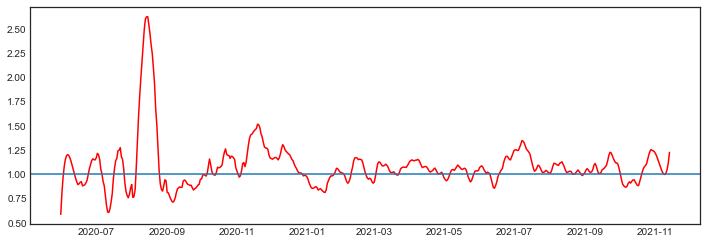

In [ ]:
import numpy as np
from scipy.signal import savgol_filter
import matplotlib.pyplot as plt

#gaussian filter 예시
#x = np.linspace(0,2*np.pi,100)
#y = np.sin(x) + np.random.random(100) * 0.2
#yhat = savgol_filter(y, 51, 3)
#plt.plot(x, y)
#plt.plot(x,yhat, color='green')
#plt.show()

plt.figure(figsize=(12, 4))
x=list(df2.loc[30:,'date'])
y=df2.loc[30:,'Cori']
yhat=savgol_filter(y,31,4)
plt.plot(x,yhat,'r')
plt.axhline(y=1)
plt.show()

AxesSubplot(0.125,0.125;0.775x0.755)


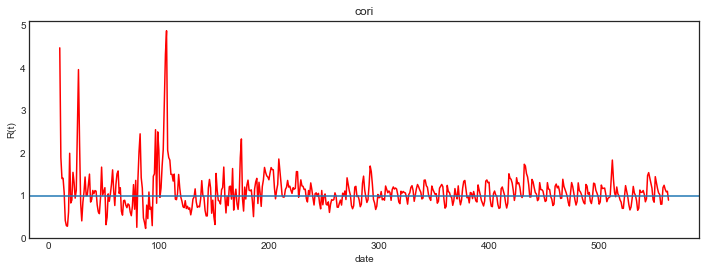

In [ ]:
from scipy.signal import savgol_filter

# cori
fig, ax = plt.subplots(1,1, figsize=(12, 4))
df.loc[10:,'Cori'].plot(ax=ax, color='red')

ax.set_xlabel('date')
ax.set_ylabel('R(t)')
#ax.set_ylim([0,3])
ax.axhline(y=1)
ax.set_title('cori')
plt.show()

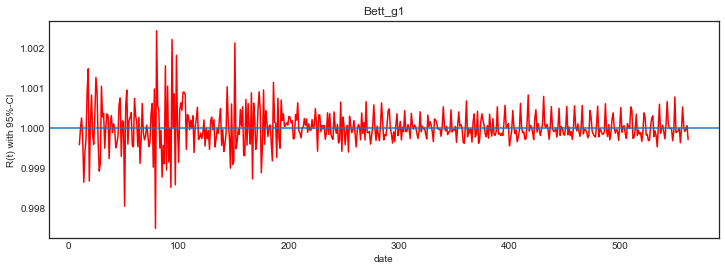

In [ ]:
# bett_g1
fig, ax = plt.subplots(1,1, figsize=(12, 4))

df.loc[10:,'Bett_g1'].plot(ax=ax, color='red')

ax.set_xlabel('date')
ax.set_ylabel('R(t) with 95%-CI')
#ax.set_ylim([0,1.5])
ax.axhline(y=1)
ax.set_title('Bett_g1')
plt.show()

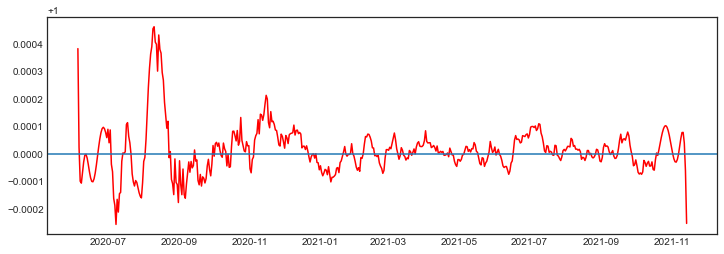

In [ ]:
# gaussian filter
plt.figure(figsize=(12, 4))
x=list(df2.loc[35:,'date'])
y=df2.loc[35:,'Bett_g1']
yhat=savgol_filter(y,51,9)
plt.plot(x,yhat,'r')
plt.axhline(y=1)
plt.show()

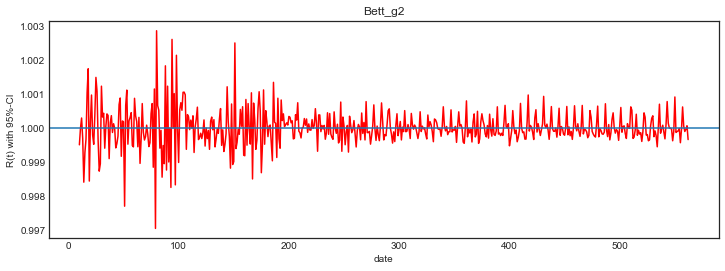

In [ ]:
# bett_g2
fig, ax = plt.subplots(1,1, figsize=(12, 4))

df.loc[10:,'Bett_g2'].plot(ax=ax, color='red')

ax.set_xlabel('date')
ax.set_ylabel('R(t) with 95%-CI')
#ax.set_ylim([0,1.5])
ax.axhline(y=1)
ax.set_title('Bett_g2')
plt.show()

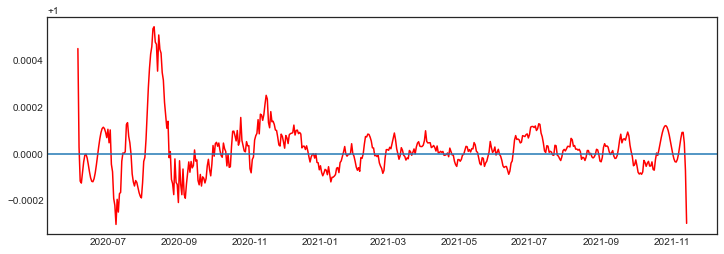

In [ ]:
# gaussian filter
plt.figure(figsize=(12, 4))
x=list(df2.loc[35:,'date'])
y=df2.loc[35:,'Bett_g2']
yhat=savgol_filter(y,51,9)
plt.plot(x,yhat,'r')
plt.axhline(y=1)
plt.show()

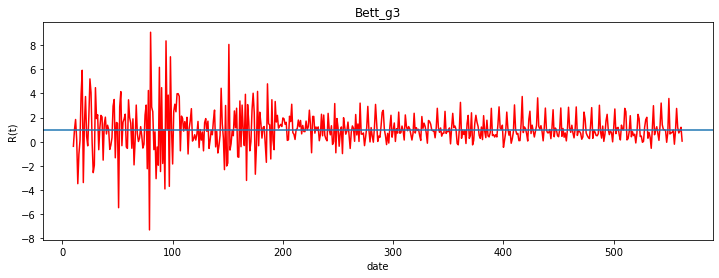

In [ ]:
# bett_g3
fig, ax = plt.subplots(1,1, figsize=(12, 4))

df.loc[10:,'Bett_g3'].plot(ax=ax, color='red')

ax.set_xlabel('date')
ax.set_ylabel('R(t)')
#ax.set_ylim([0,1.5])
ax.axhline(y=1)
ax.set_title('Bett_g3')
plt.show()

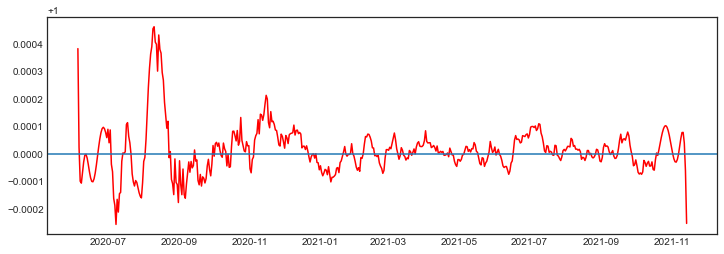

In [ ]:
# gaussian filter
plt.figure(figsize=(12, 4))
x=list(df2.loc[35:,'date'])
y=df2.loc[35:,'Bett_g1']
yhat=savgol_filter(y,51,9)
plt.plot(x,yhat,'r')
plt.axhline(y=1)
plt.show()